# Rainfall Weather Forecasting

Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.impute import SimpleImputer




In [108]:
df=pd.read_csv('/users/rekhagrg/downloads/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# EDA

In [18]:
#Display few first rows
print(df.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [19]:
print(df.info)

<bound method DataFrame.info of             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     Wi

In [20]:
#summary statiscs for numeris column
print(df.describe())

           MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000 

In [21]:
#check for missing value
print(df.isnull().sum())

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64


In [42]:
#drop any missing rows with value missing
df=df.dropna(subset=['RainTomorrow'])

In [43]:
#fills missing vlue for numerical features
df['MinTemp'].fillna(df['MinTemp'].mean(),inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(),inplace=True)


In [56]:
#convert categorical variable to numerical using label Encoding
le=LabelEncoder()
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])
df=pd.get_dummies(df,drop_first=True)

In [57]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
RainToday_Yes     0
Length: 3039, dtype: int64

There are infinity or large values in dataset. so in order to handle we have to use feature
 scaling and do Imputation 

In [58]:
# Fill missing values for numerical features
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].mean(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)

In [59]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
RainToday_Yes     0
Length: 3039, dtype: int64

In [60]:
# Split the data into features and target for classification
X_classification = df.drop(['RainTomorrow', 'Rainfall'], axis=1)
y_classification = df['RainTomorrow']

In [61]:
# Split the data into features and target for regression
X_regression = df.drop(['RainTomorrow', 'Rainfall'], axis=1)
y_regression = df['Rainfall']

In [62]:
# Split the data into features and target for classification
X_classification = df.drop(['RainTomorrow', 'Rainfall'], axis=1)
y_classification = df['RainTomorrow']

# Split the data into train and test sets for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)


In [63]:
# Assuming df is your DataFrame
df = df.fillna(df.mean())


In [64]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(1e10, inplace=True)  # Replace with a large finite number


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


# Classsification

Logistic Regression

In [68]:
#Logistic Regression
logreg_classifier=LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_classification,y_train_classification)
logreg_predictions=logreg_classifier.predict(X_test_classification)

In [69]:
#Evaluate Logistic Regression
print("Logistics Regression:")
print("Accuracy:",accuracy_score(y_test_classification,logreg_predictions))
print("Classification Report:")
print(classification_report(y_test_classification,logreg_predictions))

Logistics Regression:
Accuracy: 0.5152625152625152
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.47      0.60      1248
           1       0.28      0.66      0.39       390

    accuracy                           0.52      1638
   macro avg       0.55      0.57      0.50      1638
weighted avg       0.69      0.52      0.55      1638



Random Forest Classifier

In [70]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_classification, y_train_classification)
rf_predictions = rf_classifier.predict(X_test_classification)


In [71]:
# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test_classification, rf_predictions))
print("Classification Report:")
print(classification_report(y_test_classification, rf_predictions))



Random Forest Classifier:
Accuracy: 0.8974358974358975
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1248
           1       0.91      0.63      0.75       390

    accuracy                           0.90      1638
   macro avg       0.90      0.81      0.84      1638
weighted avg       0.90      0.90      0.89      1638



In [72]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_classification, y_train_classification)
gb_predictions = gb_classifier.predict(X_test_classification)


In [73]:
# Evaluate Gradient Boosting Classifier
print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test_classification, gb_predictions))
print("Classification Report:")
print(classification_report(y_test_classification, gb_predictions))


Gradient Boosting Classifier:
Accuracy: 0.8449328449328449
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1248
           1       0.78      0.49      0.60       390

    accuracy                           0.84      1638
   macro avg       0.82      0.72      0.75      1638
weighted avg       0.84      0.84      0.83      1638



Visualisation 

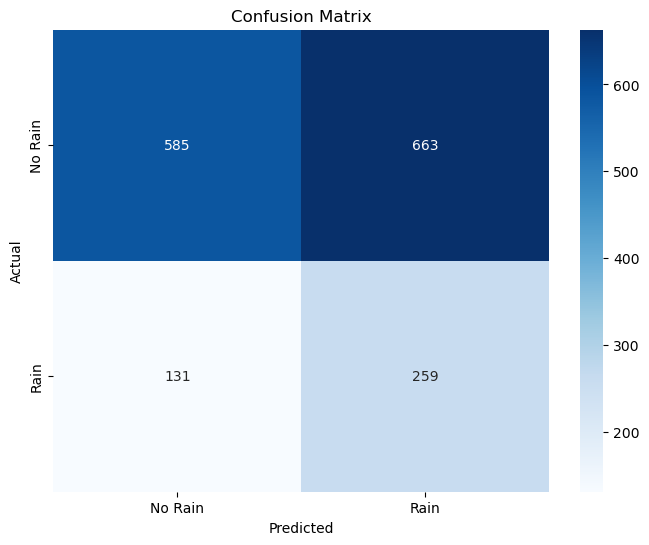

In [74]:
cm = confusion_matrix(y_test_classification, logreg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ROC curve and AUC score 

In [75]:
logreg_probs = logreg_classifier.predict_proba(X_test_classification)[:, 1]

In [76]:
fpr, tpr, thresholds = roc_curve(y_test_classification, logreg_probs)
roc_auc = roc_auc_score(y_test_classification, logreg_probs)

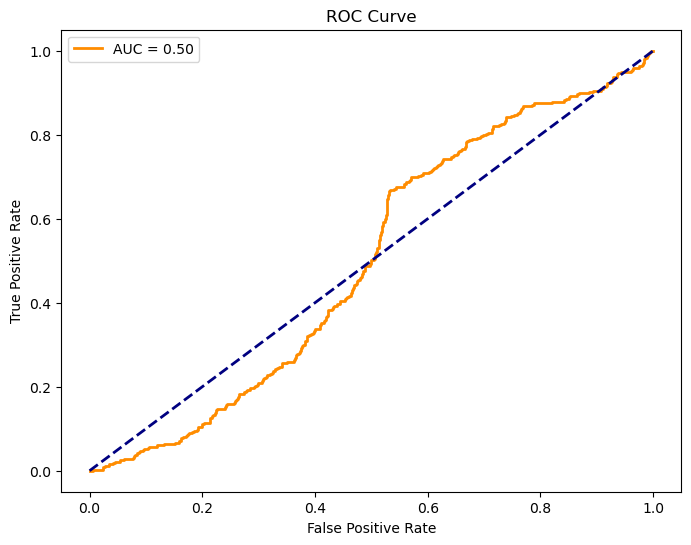

In [77]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve

In [78]:
# Calculate precision-recall curve and AUC score
precision, recall, _ = precision_recall_curve(y_test_classification, logreg_probs)
pr_auc = auc(recall, precision)

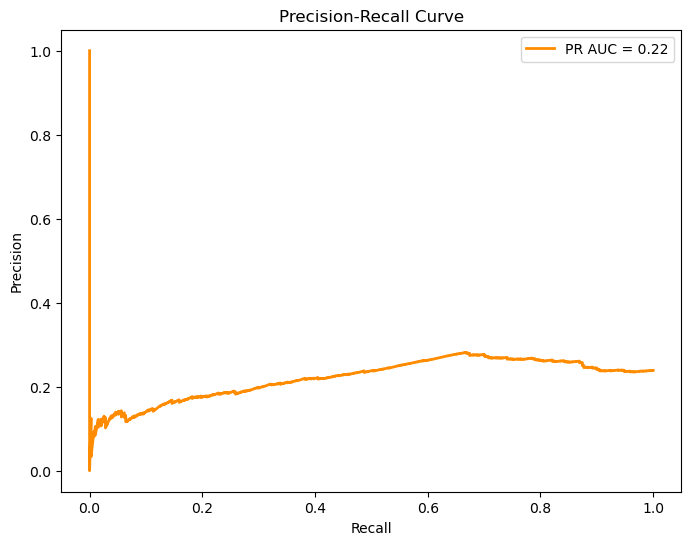

In [79]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [87]:
# Summary of Results
print("\nSummary of Results:")
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test_classification, logreg_predictions))
print(classification_report(y_test_classification, logreg_predictions))

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test_classification, rf_predictions))
print(classification_report(y_test_classification, rf_predictions))

print("\nGradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test_classification, gb_predictions))
print(classification_report(y_test_classification, gb_predictions))



Summary of Results:
Logistic Regression:
Accuracy: 0.5152625152625152
              precision    recall  f1-score   support

           0       0.82      0.47      0.60      1248
           1       0.28      0.66      0.39       390

    accuracy                           0.52      1638
   macro avg       0.55      0.57      0.50      1638
weighted avg       0.69      0.52      0.55      1638


Random Forest Classifier:
Accuracy: 0.8974358974358975
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1248
           1       0.91      0.63      0.75       390

    accuracy                           0.90      1638
   macro avg       0.90      0.81      0.84      1638
weighted avg       0.90      0.90      0.89      1638


Gradient Boosting Classifier:
Accuracy: 0.8449328449328449
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1248
           1       0.78      0.49      0.60       

In [88]:
print("X_train_classification shape:", X_train_classification.shape)
print("X_test_classification shape:", X_test_classification.shape)


X_train_classification shape: (6548, 3037)
X_test_classification shape: (1638, 3039)


In [97]:
print("Columns in X_train_classification:", X_train_classification.columns)
print("Columns in X_test_classification:", X_test_classification.columns)


Columns in X_train_classification: Index(['Date_2016-10-21', 'Date_2016-10-10', 'Date_2014-02-22',
       'Date_2009-01-29', 'Date_2012-03-17', 'Date_2009-11-01',
       'Date_2010-09-26', 'Date_2015-04-06', 'Date_2016-09-22',
       'Date_2017-06-16',
       ...
       'Date_2016-09-12', 'Date_2010-10-01', 'Date_2016-02-21',
       'Date_2016-08-03', 'Date_2008-12-02', 'Date_2015-01-14',
       'Date_2011-07-09', 'Date_2014-09-19', 'Date_2015-06-09',
       'Date_2010-05-27'],
      dtype='object', length=3037)
Columns in X_test_classification: Index(['Date_2016-10-21', 'Date_2016-10-10', 'Date_2014-02-22',
       'Date_2009-01-29', 'Date_2012-03-17', 'Date_2009-11-01',
       'Date_2010-09-26', 'Date_2015-04-06', 'Date_2016-09-22',
       'Date_2017-06-16',
       ...
       'Date_2016-02-21', 'Date_2016-08-03', 'Date_2008-12-02',
       'Date_2015-01-14', 'Date_2011-07-09', 'Date_2014-09-19',
       'Date_2015-06-09', 'Date_2010-05-27', 'LogReg_Predictions',
       'LogReg_Probabili

In [98]:
# Align columns in training and test sets
common_columns = set(X_train_classification.columns) & set(X_test_classification.columns)

X_train_classification = X_train_classification[common_columns]
X_test_classification = X_test_classification[common_columns]

# Now, both sets should have the same columns
print("X_train_classification shape:", X_train_classification.shape)
print("X_test_classification shape:", X_test_classification.shape)


X_train_classification shape: (6548, 3037)
X_test_classification shape: (1638, 3037)


/var/folders/qj/4gvz0wyj0598kk1jnjjqgsd40000gn/T/ipykernel_3919/117519792.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train_classification = X_train_classification[common_columns]
/var/folders/qj/4gvz0wyj0598kk1jnjjqgsd40000gn/T/ipykernel_3919/117519792.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_test_classification = X_test_classification[common_columns]


In [99]:
# Logistic Regression
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_classification, y_train_classification)
logreg_predictions = logreg_classifier.predict(X_test_classification)
logreg_probs = logreg_classifier.predict_proba(X_test_classification)[:, 1]

# Add predictions and probabilities to the DataFrame
X_test_classification['LogReg_Predictions'] = logreg_predictions
X_test_classification['LogReg_Probabilities'] = logreg_probs


/var/folders/qj/4gvz0wyj0598kk1jnjjqgsd40000gn/T/ipykernel_3919/770333685.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_classification['LogReg_Predictions'] = logreg_predictions


In [101]:
common_columns = X_train_classification.columns.intersection(X_test_classification.columns)


In [102]:
X_train_classification = X_train_classification[common_columns]
X_test_classification = X_test_classification[common_columns]


In [103]:
print("X_train_classification shape:", X_train_classification.shape)
print("X_test_classification shape:", X_test_classification.shape)


X_train_classification shape: (6548, 3037)
X_test_classification shape: (1638, 3037)


In [104]:
rf_classifier.fit(X_train_classification, y_train_classification)


RandomForestClassifier(random_state=42)

In [105]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_classification, y_train_classification)
rf_predictions = rf_classifier.predict(X_test_classification)
rf_probs = rf_classifier.predict_proba(X_test_classification)[:, 1]

# Add predictions and probabilities to the DataFrame
X_test_classification['RFC_Predictions'] = rf_predictions
X_test_classification['RFC_Probabilities'] = rf_probs

/var/folders/qj/4gvz0wyj0598kk1jnjjqgsd40000gn/T/ipykernel_3919/138367908.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_classification['RFC_Predictions'] = rf_predictions


In [107]:
# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Filter test set to include only common columns
X_test_classification_filtered = X_test_classification[X_train_classification.columns]

# Fit the model
gb_classifier.fit(X_train_classification, y_train_classification)

# Predictions and Probabilities
gb_predictions = gb_classifier.predict(X_test_classification_filtered)
gb_probs = gb_classifier.predict_proba(X_test_classification_filtered)[:, 1]

# Add predictions and probabilities to the DataFrame
X_test_classification['GB_Predictions'] = gb_predictions
X_test_classification['GB_Probabilities'] = gb_probs

# Display the modified DataFrame
print(X_test_classification.head())


      Date_2016-10-21  Date_2016-10-10  Date_2014-02-22  Date_2009-01-29  \
2144                0                0                0                0   
3731                0                0                0                0   
3051                0                0                0                0   
6927                0                0                0                0   
1330                0                0                0                0   

      Date_2012-03-17  Date_2009-11-01  Date_2010-09-26  Date_2015-04-06  \
2144                0                0                0                0   
3731                0                0                0                0   
3051                0                0                0                0   
6927                0                0                0                0   
1330                0                0                0                0   

      Date_2016-09-22  Date_2017-06-16  ...  Date_2008-12-02  Date_2015-01-14  \
2144 

In [112]:
common_columns = set(X_train_classification.columns) & set(X_test_classification.columns)

X_train_classification = X_train_classification[common_columns]
X_test_classification = X_test_classification[common_columns]


/var/folders/qj/4gvz0wyj0598kk1jnjjqgsd40000gn/T/ipykernel_3919/3719187667.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train_classification = X_train_classification[common_columns]
/var/folders/qj/4gvz0wyj0598kk1jnjjqgsd40000gn/T/ipykernel_3919/3719187667.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_test_classification = X_test_classification[common_columns]


In [113]:
print("X_train_classification shape:", X_train_classification.shape)
print("X_test_classification shape:", X_test_classification.shape)


X_train_classification shape: (6548, 3037)
X_test_classification shape: (1638, 3037)


In [114]:
# Create a DataFrame to store updated results
result_df = pd.DataFrame()

# Add true labels and predictions for each model
result_df['True_Labels'] = y_test_classification
result_df['LogReg_Predictions'] = logreg_predictions
result_df['RF_Predictions'] = rf_predictions
result_df['GB_Predictions'] = gb_predictions

# Add probabilities for each model
result_df['LogReg_Probabilities'] = logreg_probs
result_df['RF_Probabilities'] = rf_classifier.predict_proba(X_test_classification)[:, 1]
result_df['GB_Probabilities'] = gb_probs

# Display the updated result DataFrame
print(result_df.head())


      True_Labels  LogReg_Predictions  RF_Predictions  GB_Predictions  \
2144            1                   0               0               0   
3731            1                   1               0               1   
3051            1                   1               1               1   
6927            0                   0               0               0   
1330            0                   1               0               0   

      LogReg_Probabilities  RF_Probabilities  GB_Probabilities  
2144              0.267221              0.28          0.431683  
3731              0.500000              0.42          0.537651  
3051              0.500000              0.93          0.935964  
6927              0.139020              0.06          0.065764  
1330              0.500000              0.08          0.045767  
